# 1D convection diffusion equation
## Discretization exercise


$$
U\left(x\right)
\dfrac{\mathrm{d}T\left(x\right)}{\mathrm{d}x}+
\dfrac{\mathrm{d}^{2}T\left(x\right)}{\mathrm{d}x^{2}}
=0.
$$

Use a central difference based discretization for both the derivatives:

$$
T^{\left(k+1\right)}_{i}=
\left(\dfrac{1}{2}+\dfrac{U\left(x\right)\Delta x}{4}\right)T^{\left(k\right)}_{i+1}+
\left(\dfrac{1}{2}-\dfrac{U\left(x\right)\Delta x}{4}\right)T^{\left(k\right)}_{i-1}.
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, dx = np.linspace(start=0, stop=1, num=10, retstep=True)
max_iterations = 300
tolerance = 1e-8
iteration = 0
numeric_error = 1
U = 1  # speed
T = np.zeros_like(x)
T[-1] = 1  # Initial condition
L, R = (0.5 + U * dx / 4), (0.5 - U * dx / 4)
T_new = T.copy()

In [3]:
while (numeric_error > tolerance) and (iteration < max_iterations):
    # T[0], T[-1] = 0, 1  # Boundary condition
    T_new[1:-1] = L * T[2:] + R * T[:-2]
    numeric_error = np.sum(np.abs(T_new - T))
    iteration += 1
    T = T_new.copy()

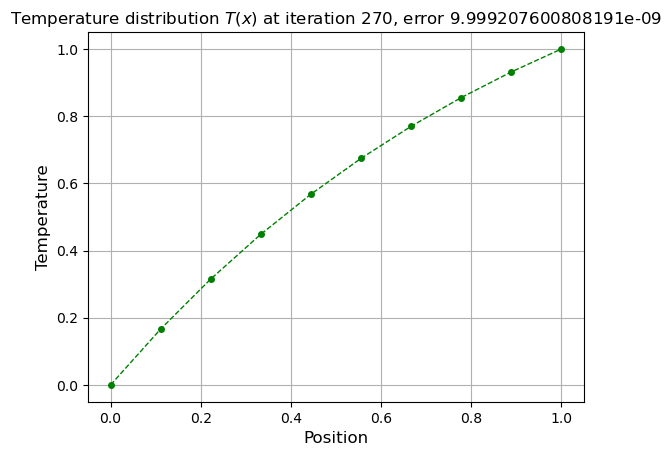

In [4]:
fig, ax = plt.subplots()
ax.plot(x, T, "go--", linewidth=1, markersize=4)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.grid()
ax.set_title(
    f"Temperature distribution $T(x)$ at iteration {iteration}, error {numeric_error}",
    fontsize=12,
);